In [ ]:
# data source: https://www.kaggle.com/mauryashubham/english-premier-league-players-dataset
# the aim of this project is to predict epl players' market values (17-18 season), using player characteristics and FPL stats

In [21]:
# clear all variables, functions, etc
%reset -f

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np #foundational package for scientific computing
import matplotlib as mpl #collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
from IPython import display #pretty printing of dataframes in Jupyter notebook
import seaborn as sns #data visualization

print('All libraries loaded successfully')

# Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

# Fixing random state for reproducibility
np.random.seed(123)

All libraries loaded successfully


In [22]:
# import full dataset
full = pd.read_csv('../data/epl_players/epldata_final.csv')

# view data type of each variable
print(full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
name            461 non-null object
club            461 non-null object
age             461 non-null int64
position        461 non-null object
position_cat    461 non-null int64
market_value    461 non-null float64
page_views      461 non-null int64
fpl_value       461 non-null float64
fpl_sel         461 non-null object
fpl_points      461 non-null int64
region          460 non-null float64
nationality     461 non-null object
new_foreign     461 non-null int64
age_cat         461 non-null int64
club_id         461 non-null int64
big_club        461 non-null int64
new_signing     461 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 61.3+ KB
None


In [23]:
# view number of rows and number of columns of dataframe
print(full.shape)
print("-"*30)

# view summary statistics of a dataframe (count, mean, sd, min, max, quantiles)
print(full.describe())
print("-"*30)

# view head of dataframe
print(full.head(10))

(461, 17)
------------------------------
              age  position_cat  market_value   page_views   fpl_value  \
count  461.000000    461.000000    461.000000   461.000000  461.000000   
mean    26.804772      2.180043     11.012039   763.776573    5.447939   
std      3.961892      1.000061     12.257403   931.805757    1.346695   
min     17.000000      1.000000      0.050000     3.000000    4.000000   
25%     24.000000      1.000000      3.000000   220.000000    4.500000   
50%     27.000000      2.000000      7.000000   460.000000    5.000000   
75%     30.000000      3.000000     15.000000   896.000000    5.500000   
max     38.000000      4.000000     75.000000  7664.000000   12.500000   

       fpl_points      region  new_foreign     age_cat     club_id  \
count  461.000000  460.000000   461.000000  461.000000  461.000000   
mean    57.314534    1.993478     0.034707    3.206074   10.334056   
std     53.113811    0.957689     0.183236    1.279795    5.726475   
min      0.0

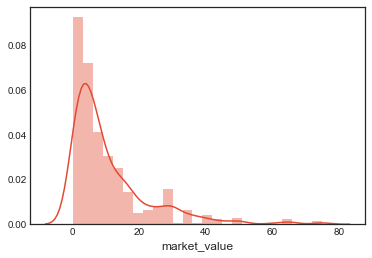

In [24]:
# view distribution of market values
sns.distplot(full['market_value'].dropna(), kde=True) # lognormal; apply transformation before running ML algorithm

In [25]:
##### complete

# view the percentage of missing values for each variable
print((full.isnull().sum() / full.shape[0] * 100).sort_values(ascending=False)) # full.shape[0] returns the no. of rows
print('-'*30)

# only 'region' has missing values. view the rows that have missing value for 'region'
print(full.loc[(full['region'].isnull()),])
# the player is from Benin, which is in Africa, so let's assign a 4 (represents "rest of world") to his 'region'
full.loc[(full['name']=='Steve Mounie'),'region'] = 4

# verify that there are no more variables with missing values
print(full.isnull().sum())

region          0.21692
new_signing     0.00000
fpl_value       0.00000
club            0.00000
age             0.00000
position        0.00000
position_cat    0.00000
market_value    0.00000
page_views      0.00000
fpl_sel         0.00000
big_club        0.00000
fpl_points      0.00000
nationality     0.00000
new_foreign     0.00000
age_cat         0.00000
club_id         0.00000
name            0.00000
dtype: float64
------------------------------
             name          club  age position  position_cat  market_value  \
188  Steve Mounie  Huddersfield   22       CF             1           5.5   

     page_views  fpl_value fpl_sel  fpl_points  region nationality  \
188          56        6.0   0.60%           0     NaN       Benin   

     new_foreign  age_cat  club_id  big_club  new_signing  
188            0        2        8         0            0  
name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_

In [26]:
##### create

# englishmen might have higher market values, due to EPL's homegrown player rule. let's create a dummy for englishmen
full['englishman']=0
full.loc[(full['nationality']=='England'),'englishman']=1
print(full['englishman'].value_counts())
print('-'*50)

0    305
1    156
Name: englishman, dtype: int64
--------------------------------------------------


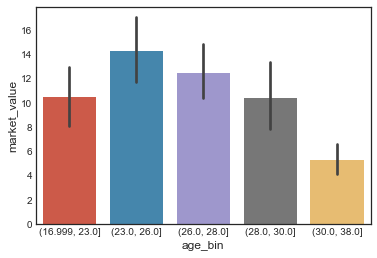

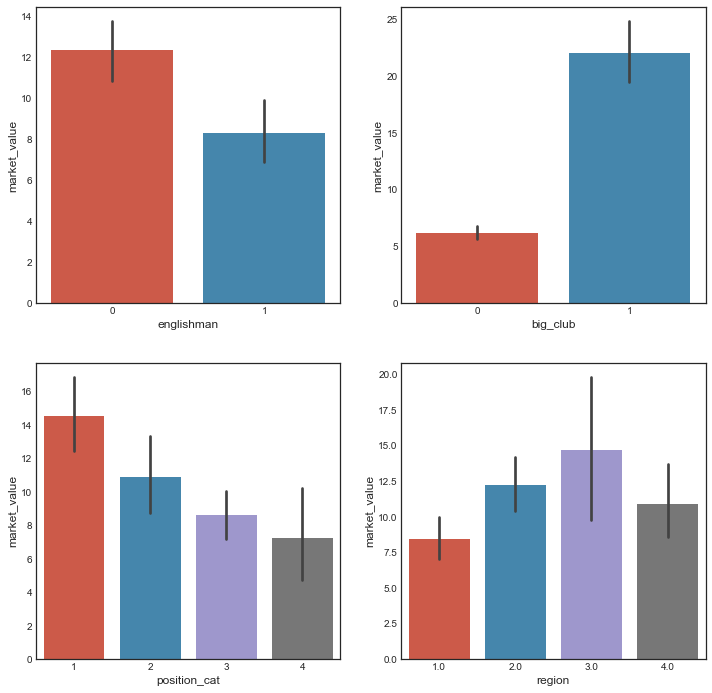

In [27]:
##### data visualizations

# create five age bins based on age variable (for data viz)
full['age_bin'] = pd.qcut(full['age'],5)
# plot market value against age bins
sns.barplot(x = 'age_bin', y = 'market_value', data=full) # looks like players' values are highest just before their prime age
del full['age_bin']

# plot market value against 'englishman', 'big_club', 'position', 'region'
fig, saxis = plt.subplots(2,2,figsize=(12,12)) # to fit 2 rows and 2 columns worth of subplots in one plot
sns.barplot(x = 'englishman', y = 'market_value', data=full, ax = saxis[0][0]) # english players are surprisingly worth less
sns.barplot(x = 'big_club', y = 'market_value', data=full, ax = saxis[0][1]) # big club players are unsurprisingly worth more
sns.barplot(x = 'position_cat', y = 'market_value', data=full, ax = saxis[1][0]) # attackers are unsurpringly worth most
sns.barplot(x = 'region', y = 'market_value', data=full, ax = saxis[1][1]) # players from the americas are worth most (but high sd)

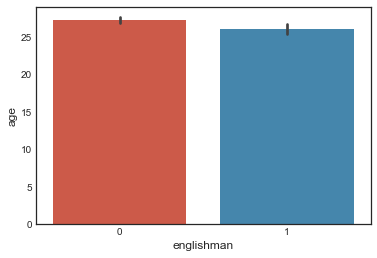

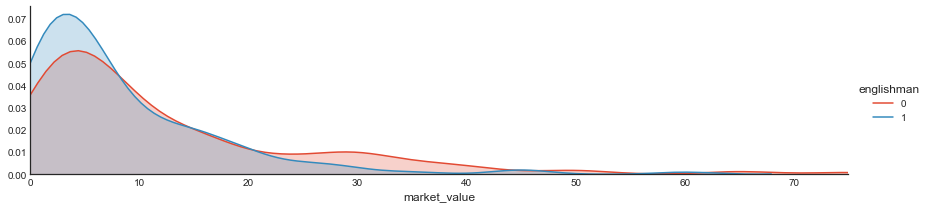

In [28]:
##### data visualizations (continued)

# it is surprising that english players are generally worth less. perhaps clubs are just using young english players to meet the homegrown rule
sns.barplot(x='englishman', y='age', data=full) # english players are younger on average, but only slightly

# let's see if the distribution of market values depends on whether the players are English
a = sns.FacetGrid(full, hue='englishman', aspect=4 ) # use the dataset 'full', and plot one market_value distribution per category of 'englishman'
a.map(sns.kdeplot, 'market_value', shade= True ) # kernel density plot of market_value
a.set(xlim=(0, full['market_value'].max())) # set the boundaries of x-axis
a.add_legend() # add a legend for the distributions

In [29]:
##### convert

# drop useless variables
full = full.drop(['name','age_cat'], axis=1)

# some categorical variables have many levels and have been expressed more succinctly in other variables; drop them
full = full.drop(['club','position','nationality','club_id'],axis=1)

# convert fpl_sel to numeric
full['fpl_sel'] = full['fpl_sel'].str.split("%", expand=True)[0]
full['fpl_sel'] = full['fpl_sel'].astype('float')

# one-hot encode categorical variables
for var in ['position_cat','region']:
    full[var] = full[var].astype('object')
full = pd.get_dummies(full)

# ensure all variables are numeric and non-missing
print(full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 18 columns):
age               461 non-null int64
market_value      461 non-null float64
page_views        461 non-null int64
fpl_value         461 non-null float64
fpl_sel           461 non-null float64
fpl_points        461 non-null int64
new_foreign       461 non-null int64
big_club          461 non-null int64
new_signing       461 non-null int64
englishman        461 non-null int64
position_cat_1    461 non-null uint8
position_cat_2    461 non-null uint8
position_cat_3    461 non-null uint8
position_cat_4    461 non-null uint8
region_1.0        461 non-null uint8
region_2.0        461 non-null uint8
region_3.0        461 non-null uint8
region_4.0        461 non-null uint8
dtypes: float64(3), int64(7), uint8(8)
memory usage: 39.7 KB
None


In [30]:
# split the cleaned full dataset into train and test datasets
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(full.drop(['market_value'], axis=1), full['market_value'], test_size=0.2)

# training data: apply log transform to target variable
ytrain = np.log(ytrain)

In [31]:
##### model building

### view k-fold cross-validation performance of model
from sklearn.ensemble import RandomForestRegressor

my_model1 = RandomForestRegressor(n_jobs = -1, # fully utilize the cores on your computer
                                  n_estimators = 250, # number of trees
                                  max_features = "sqrt", # number of features to consider at each split
                                  max_depth = 4) # maximum tree depth

cv_results = model_selection.cross_validate(my_model1,
                                            xtrain,
                                            ytrain,
                                            scoring='neg_mean_squared_error',
                                            cv = 10)

print("the mean training MSE is:", cv_results['train_score'].mean()) # ignore the negative sign
print("the mean validation MSE is:", cv_results['test_score'].mean()) # ignore the negative sign

the mean training MSE is: -0.3480703702821688
the mean validation MSE is: -0.48368633366319813


In [32]:
##### use random search to optimize the hyperparameters, while building the optimal model concurrently
from scipy.stats import randint
from scipy.stats import uniform

param_dist = {'max_depth': randint(3,8), # integer between 3 and 8 inclusive
              'n_estimators': randint(200,300), # integer between 100 and 300 inclusive
              'max_features': ['sqrt']
             }

tune_model = model_selection.RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),
                                                param_distributions=param_dist,
                                                scoring = "neg_mean_squared_error",
                                                cv = 10,
                                                n_iter = 10) # number of iterations of random search

tune_model.fit(xtrain, ytrain)

#print(tune_model.cv_results_['params'])
print('the optimized hyperparameters are: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("after optimization, the mean training MSE is: {:.4f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_])) 
#print(tune_model.cv_results_['mean_test_score'])
print("after optimization, the mean validation MSE is: {:.4f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]))

the optimized hyperparameters are:  {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 275}
after optimization, the mean training MSE is: -0.1964
after optimization, the mean validation MSE is: -0.4213


     predicted_market_value  actual_market_value
283                3.009567                 0.10
178                1.017097                 0.25
132                1.043341                 0.25
66                 2.652762                 0.50
179                0.593963                 0.50
184                2.580845                 0.65
171                0.890043                 0.75
438                2.077551                 1.00
285                1.492011                 1.00
162                1.687656                 1.50
231                3.747425                 1.50
345                3.560036                 1.50
336                4.556741                 1.50
370                2.179240                 2.00
239                6.376175                 2.00
399                4.414688                 2.00
236                4.061222                 2.00
165                2.155445                 2.00
151                4.058500                 2.00
36                 3

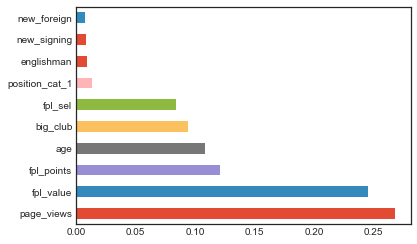

In [33]:
##### use optimized hyperparameters to build random forest
my_rf = RandomForestRegressor(n_jobs = -1, # fully utilize the cores on your computer
                              n_estimators = tune_model.best_params_['n_estimators'], # number of trees
                              max_features = tune_model.best_params_['max_features'], # number of features to consider at each split
                              max_depth = tune_model.best_params_['max_depth']) # maximum tree depth

# fit the random forest
rf_model1 = my_rf.fit(xtrain,ytrain)

# view feature importances
feature_importances = pd.Series(rf_model1.feature_importances_, index=xtrain.columns)
feature_importances = feature_importances.sort_values(ascending=False) # sort from highest to lowest importance; for pandas dataframe sorting, refer to https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
feature_importances.nlargest(10).plot(kind='barh')

# use the fitted model to make predictions (remember to exponentiate since we took log just now)
rf_pred1 = np.exp(rf_model1.predict(xtest))

# test dataset: compare predicted values to actual values
comparison_df = pd.DataFrame({'predicted_market_value': rf_pred1, 
                              'actual_market_value': ytest})
print(comparison_df.sort_values(by=['actual_market_value']))

       predicted_market_value  actual_market_value
count               93.000000            93.000000
mean                 9.511396            12.123656
std                  9.970802            14.323684
min                  0.593963             0.100000
25%                  3.504253             2.500000
50%                  5.831244             5.500000
75%                 11.122405            15.000000
max                 47.823370            75.000000


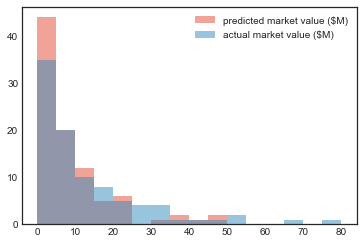

In [34]:
# compare predicted and actual market values
print(comparison_df.describe())

listofbins = list(range(17)) # generate list of integers from 0 to 16
listofbins = list(map(lambda x: x * 5, listofbins)) # multiply each element in the list by 5

plt.hist(comparison_df['predicted_market_value'], bins=listofbins, alpha=0.5, label='predicted market value ($M)')
plt.hist(comparison_df['actual_market_value'], bins=listofbins, alpha=0.5, label='actual market value ($M)')
plt.legend(loc='upper right')
plt.show()

In [35]:
##### let's see if regularized linear regression can outperform random forest

# log transform right-skewed numeric features:
from scipy.stats import skew

train = pd.concat([xtrain,xtest], axis=0)

numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

xtrain[skewed_feats] = np.log1p(xtrain[skewed_feats])
xtest[skewed_feats] = np.log1p(xtest[skewed_feats])

# compute RMSE for lasso regression
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, xtrain, ytrain, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

from sklearn.linear_model import LassoCV

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
print('the RMSE for lasso regression is:', rmse_cv(model_lasso).mean())

# compare against RMSE for random forest
print('the RMSE for random forest regressor is:', rmse_cv(my_rf).mean()) # seems like rf is better

the RMSE for lasso regression is: 0.7035530668751717
the RMSE for random forest regressor is: 0.6370449093016843


Lasso picked 17 variables and eliminated the other 0 variables
     lasso_prediction  rf_prediction  actual_market_value
283          2.952029       3.009567                 0.10
178          0.000000       1.017097                 0.25
132          0.000000       1.043341                 0.25
66           1.148443       2.652762                 0.50
179          0.000000       0.593963                 0.50
184          0.000000       2.580845                 0.65
171          0.128164       0.890043                 0.75
438          2.198153       2.077551                 1.00
285          0.131710       1.492011                 1.00
162          0.023980       1.687656                 1.50
231         11.541249       3.747425                 1.50
345          2.707258       3.560036                 1.50
336          4.156586       4.556741                 1.50
370          2.034203       2.179240                 2.00
239          2.659389       6.376175                 2.00
399      

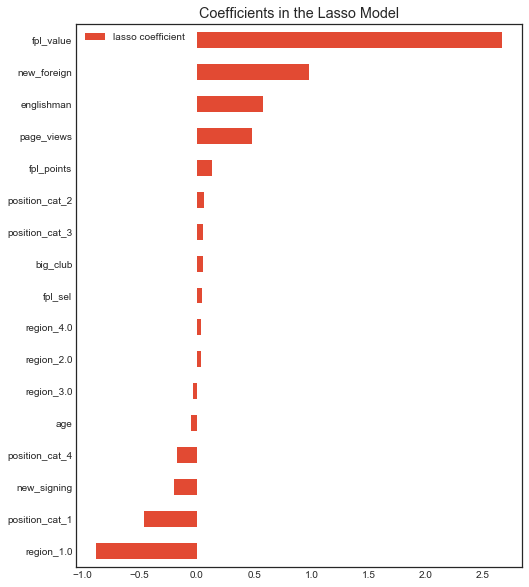

In [36]:
# use trained lasso model to generate coefficients plot and predictions
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(xtrain,ytrain)

coef = pd.Series(model_lasso.coef_, index = xtrain.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.DataFrame({'lasso coefficient': coef.sort_values()})
mpl.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

lasso_pred1 = np.expm1(model_lasso.predict(xtest))
lasso_pred1[lasso_pred1<0]=0 # some predictions are negative; doesn't make sense so convert to zero

# compare actual market values against lasso predictions and rf predictions
comparison2_df = pd.DataFrame({'lasso_prediction': lasso_pred1, 
                               'rf_prediction': rf_pred1,
                              'actual_market_value': ytest})
print(comparison2_df.sort_values(by=['actual_market_value']))

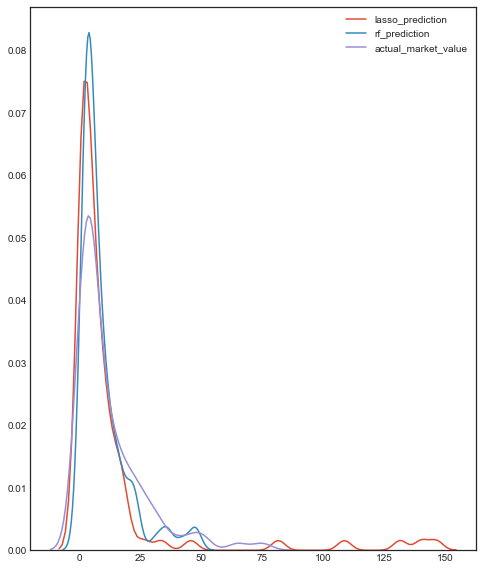

In [37]:
# compare actual market values against lasso predictions and rf predictions (kernel density plots)
fig, ax = plt.subplots()
sns.kdeplot(comparison2_df['lasso_prediction'], ax=ax) # seems like lasso produces some overly-high predictions
sns.kdeplot(comparison2_df['rf_prediction'], ax=ax)
sns.kdeplot(comparison2_df['actual_market_value'], ax=ax)

In [38]:
# calculate lasso RMSE post-exponentiation
comparison2_df['lasso_sqerror'] = comparison2_df['lasso_prediction'] - comparison2_df['actual_market_value']
comparison2_df['lasso_sqerror'] = list(map(lambda x: x ** 2, comparison2_df['lasso_sqerror']))
print('for lasso, the post-exponentiation RMSE is:', np.sqrt(comparison2_df['lasso_sqerror'].mean()))

# calculate rf RMSE post-exponentiation
comparison2_df['rf_sqerror'] = comparison2_df['rf_prediction'] - comparison2_df['actual_market_value']
comparison2_df['rf_sqerror'] = list(map(lambda x: x ** 2, comparison2_df['rf_sqerror']))
print('for rf, the post-exponentiation RMSE is:', np.sqrt(comparison2_df['rf_sqerror'].mean())) # seems that rf is much better

for lasso, the post-exponentiation RMSE is: 17.609286178915745
for rf, the post-exponentiation RMSE is: 6.927182570917448
